<a href="https://colab.research.google.com/github/Jasmine-kaur8/Titanic_Project/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train(project).csv to titanic_train(project) (2).csv


Imported the data

In [180]:
#importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#outlier removal
from numpy import percentile
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,  AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


Imported the required documents

In [90]:
data = pd.read_csv('titanic_train(project).csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Reading the data

In [91]:
data.shape

(891, 12)

The data has 891 rows and 12 columns

In [92]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin > Age > Embarked features contain a number of null values in that order for the dataset.

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Categorical: Survived, Sex, and Embarked. Ordinal: Pclass. Continous: Age, Fare. Discrete: SibSp, Parch.
Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.
Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [94]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are outliers in the Fare column. 

In [95]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

O shows the passengers who could not survive and 1 shows the passengers who did survived.

In [96]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

There are 577 males and 314 females

In [97]:
data['Name'].unique().shape

(891,)

Names are unique across the dataset (count=unique=891)

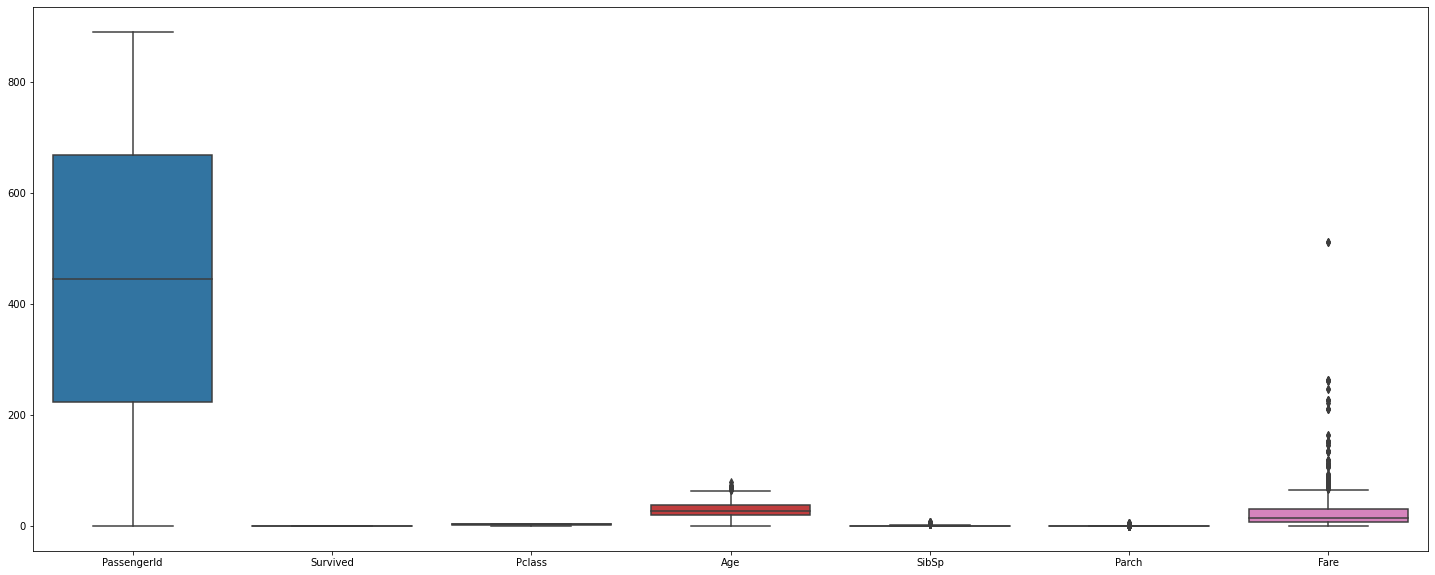

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.boxplot(data = data, ax=ax)
plt.show()

Age, SibSp and Parch columns have some outliers. Fare column has many outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fceecd65a10>,
      dtype=object)

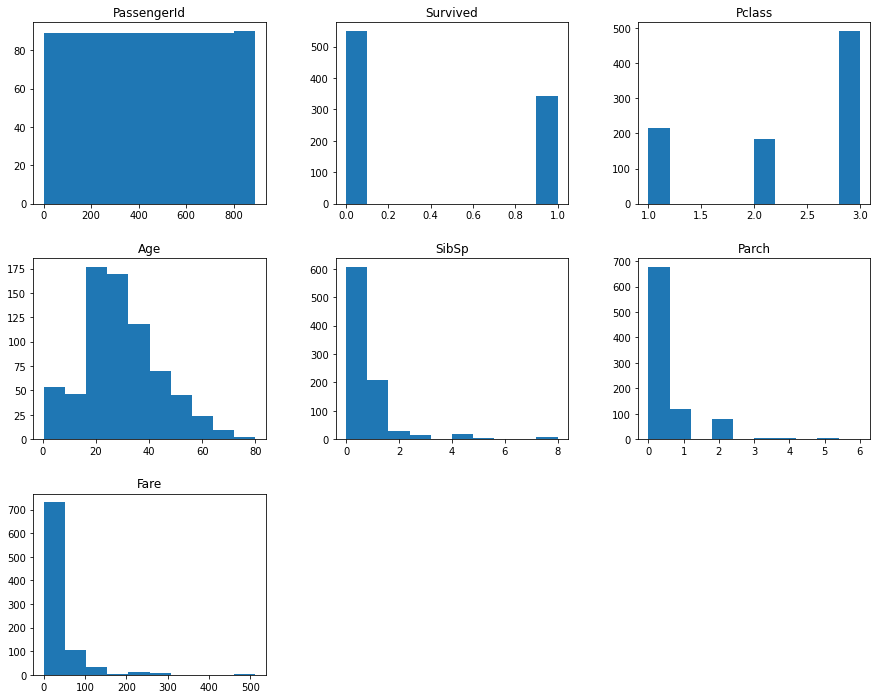

In [99]:
data.hist(figsize=(15,12), grid = False)

SibSp, Parch and Fare columns have skewed data

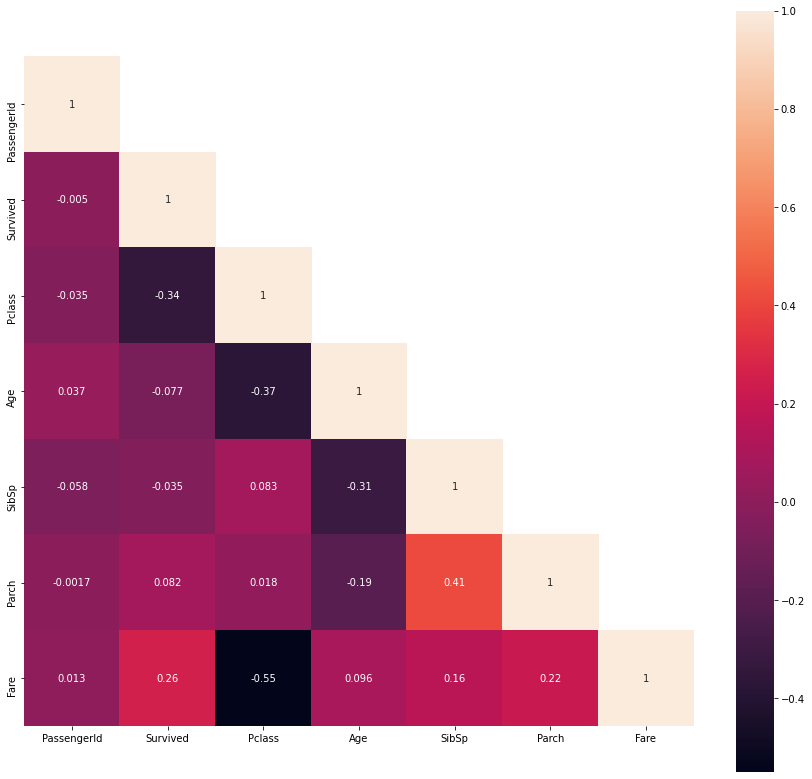

In [100]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(15,14)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

SibSp and Parch columns seem to be related to each other

In [101]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Pclass, SibSp, Parch and Fare are skewed data

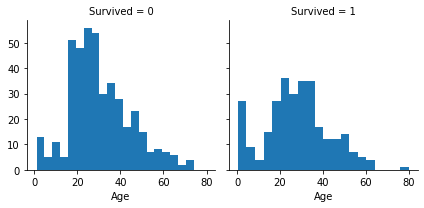

In [102]:
graph1 = sns.FacetGrid(data, col='Survived')
graph1.map(plt.hist, 'Age', bins=20)

The distribution of age of people who were not able to survive shows that most of the individuals lie between the age of 20 and 40. The age distribution of those who survived mostly lies in the range 15 and 35.

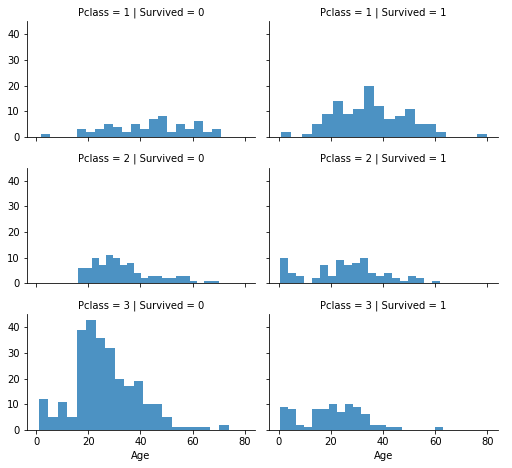

In [103]:
graph2 = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
graph2.map(plt.hist, 'Age', alpha=.8, bins=20)
graph2.add_legend();

The highest frequency of people who did not survived were in the Pclass = 3.

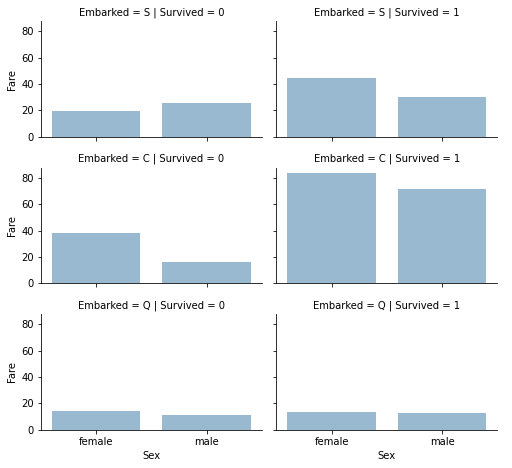

In [104]:
graph3 = sns.FacetGrid(data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
graph3.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
graph3.add_legend()

Most of survived individual were in embarked = C. Among those who were able to survived, a greater proportion of them were females

In [105]:
d1 = (data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
d1

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Proportion of individuals in Pclass that survived.

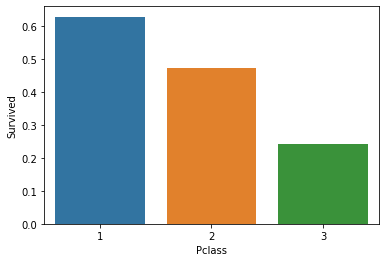

In [106]:
sns.barplot(y='Survived', x='Pclass', data=d1)

Visual representation of proportion of individuals in Pclass that survived.

In [107]:
d2 = (data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())
d2

,Sex,Survived
0,female,0.742038
1,male,0.188908


Proportion of male and female who survived.

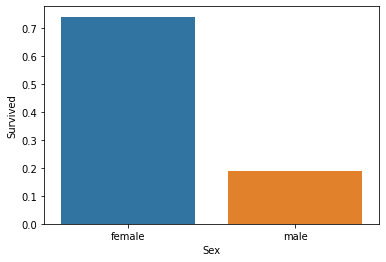

In [108]:
sns.barplot(y='Survived', x='Sex', data=d2)

Visual representation of proportion of male and female who survived.
A very large proportion of female survived as compared to that of male.

In [109]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
d3 = (data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())
d3

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


Proportion of individuals with different family size who survived.

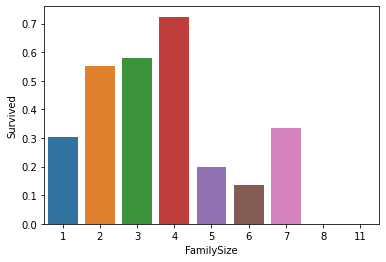

In [110]:
sns.barplot(y='Survived', x='FamilySize', data=d3)

Visual representation of proportion of individuals with different family size who survived. The families with 4 family members had the highest survival rate.

In [111]:
data['Alone'] = 0
data.loc[data['FamilySize'] == 1, 'Alone'] = 1
d4 = (data[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean())
d4

,Alone,Survived
0,0,0.505650
1,1,0.303538


Proportion of alone individuals who survived.

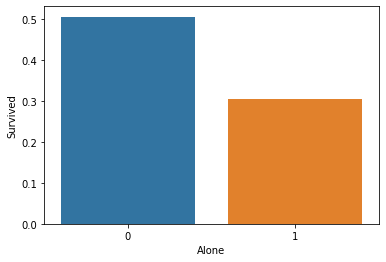

In [112]:
sns.barplot(y='Survived', x='Alone', data=d4)

Visual representation of proportion of individuals in Pclass that survived. Those individual who were alone had the higher survival rate than those who were not alone.

In [113]:
data['Embarked'] = data['Embarked'].fillna('S')
d5 = (data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
d5

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Proportion of individuals in different embarked who survived.

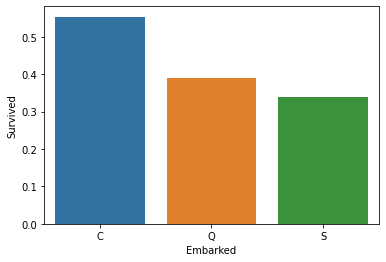

In [114]:
sns.barplot(y='Survived', x='Embarked', data=d5)

Visual representation of proportion of individuals in different embarked that survived. The highest is C and then Q and the least is S.

In [115]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['CategoricalFare'] = pd.qcut(data['Fare'], 4)
d6 = (data[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())
d6

,CategoricalFare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


We divided the fare into 4 brackets and filled the null values using median.

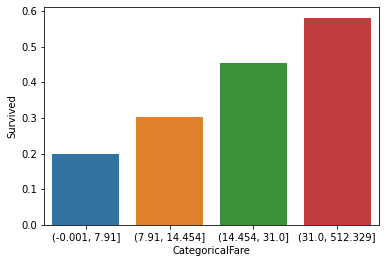

In [116]:
sns.barplot(y='Survived', x='CategoricalFare', data=d6)

The fare and survival rate are positively related to each other.

In [117]:
age_avg = data['Age'].mean()
age_std = data['Age'].std()
age_null_count = data['Age'].isnull().sum()
    
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
data['Age'][np.isnan(data['Age'])] = age_null_random_list
data['Age'] = data['Age'].astype(int)
    
data['CategoricalAge'] = pd.cut(data['Age'], 5)

d7 = (data[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())
d7

,CategoricalAge,Survived
0,"(-0.08, 16.0]",0.527778
1,"(16.0, 32.0]",0.350109
2,"(32.0, 48.0]",0.382114
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


We filled the null values in the age column using random integer from 1 standard deviation away from the mean.

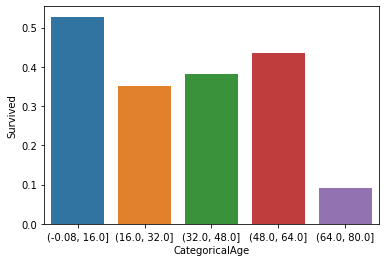

In [118]:
sns.barplot(y='Survived', x='CategoricalAge', data=d7)

The highest survival rate is of the individuals below the age of 16. The second highest survival rate is of the individuals between the age of 48 and 64.

In [119]:
#MAPPING THE CATEGORICAL COLUMNS TO THE NUMERICAL VALUES

In [120]:
# Mapping Sex
data['Sex'] = data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

Encoded female as 0 and male as 1.

In [121]:

# Mapping Embarked
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
# Mapping Fare
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare'] = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3
data['Fare'] = data['Fare'].astype(int)
    
# Mapping Age
data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age']= 4

data



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,2,0
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,1,0,0,211536,1,NaN,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,0,0,112053,2,B42,0,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,W./C. 6607,2,NaN,0,4,0
889,890,1,1,"Behr, Mr. Karl Howell",1,1,0,0,111369,2,C148,1,1,1


Encoded Embarked, fare and age into numerical values.

In [125]:
# Feature Selection

data1 = data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch', 'FamilySize'], axis = 1)
data1

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,CategoricalFare,CategoricalAge
0,0,3,1,1,0,0,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,0,2,3,1,0,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,0,1,1,0,1,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,0,2,3,0,0,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,1,2,1,0,1,"(7.91, 14.454]","(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,1,0,1,"(7.91, 14.454]","(16.0, 32.0]"
887,1,1,0,1,2,0,1,"(14.454, 31.0]","(16.0, 32.0]"
888,0,3,0,1,2,0,0,"(14.454, 31.0]","(16.0, 32.0]"
889,1,1,1,1,2,1,1,"(14.454, 31.0]","(16.0, 32.0]"


Ticket feature may be dropped from our analysis as there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values.
PassengerId may be dropped as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

In [127]:
data2 = data1.drop(columns = ['CategoricalAge', 'CategoricalFare'], axis = 1)
data2

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,1,1,0,0,0
1,1,1,0,2,3,1,0
2,1,3,0,1,1,0,1
3,1,1,0,2,3,0,0
4,0,3,1,2,1,0,1
...,...,...,...,...,...,...,...
886,0,2,1,1,1,0,1
887,1,1,0,1,2,0,1
888,0,3,0,1,2,0,0
889,1,1,1,1,2,1,1


CategoricalAge and CategoricalFare can also be dropped as we encoded the age brackets into numerical numbers.

In [129]:
data3 = data2.values
data3

array([[0, 3, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 3, 1, 0],
       [1, 3, 0, ..., 1, 0, 1],
       ...,
       [0, 3, 0, ..., 2, 0, 0],
       [1, 1, 1, ..., 2, 1, 1],
       [0, 3, 1, ..., 0, 2, 1]])

These are the values of the final data

In [143]:
#Let's find ROC and AUC curve

from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=62)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier', 'AdaBoostClassifier']

roc_auc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    roc_auc.append(roc_auc_score( y_test, pred))

score = {'Modelling Algorithm': model_names, 'ROC_AUC_SCORE': roc_auc}
score_df = pd.DataFrame(score)
score_df

,Modelling Algorithm,ROC_AUC_SCORE
0,KNearestNeighbors,0.780300
1,RandomForestClassifier,0.784629
2,DecisionTree,0.754880
3,GradientBoostingClassifier,0.779621
4,AdaBoostClassifier,0.773680


The highest ROC_AUC_SCORE is of the random forest classifier

In [130]:
#MODEL

In [131]:
X = data2.drop(columns = ['Survived'])
Y = data2['Survived']

Spliting the data into dependent variable as Y and independent variable as X.


In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=62)
models = [KNeighborsClassifier(3), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier(),AdaBoostClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier', 'AdaBoostClassifier' ]

acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models = {'Modelling Algorithm': model_names, 'Accuracy': acc}
models_df = pd.DataFrame(models)
models_df


,Modelling Algorithm,Accuracy
0,KNearestNeighbors,0.762332
1,RandomForestClassifier,0.798206
2,DecisionTree,0.789238
3,GradientBoostingClassifier,0.811659
4,AdaBoostClassifier,0.793722


Trained the model and received accuracy score of all the different models.

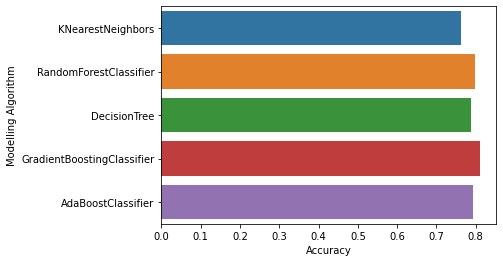

In [138]:
sns.barplot(y='Modelling Algorithm', x='Accuracy', data=models_df)

Visual representation of the accuracy score.

In [139]:
#Now, let's apply cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=62)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier() ,AdaBoostClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier' , 'AdaBoostClassifier']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, X, Y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,KNearestNeighbors,0.795782
1,RandomForestClassifier,0.794639
2,DecisionTree,0.793510
3,GradientBoostingClassifier,0.799096
4,AdaBoostClassifier,0.780039


Applied cross validation to all the models.

In [140]:
#Comparing CV Score and the Accuracy score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['ACCURACY'] = acc
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [acc[0] - CV_S[0], acc[1] - CV_S[1], acc[2] - CV_S[2], acc[3] - CV_S[3] , acc[4] - CV_S[4]]
Comparison

,Modelling Algorithm,ACCURACY,CV SCORE,Difference
0,KNearestNeighbors,0.762332,0.795782,-0.033450
1,RandomForestClassifier,0.798206,0.794639,0.003567
2,DecisionTree,0.789238,0.793510,-0.004272
3,GradientBoostingClassifier,0.811659,0.799096,0.012563
4,AdaBoostClassifier,0.793722,0.780039,0.013683


Comparing accuracy and CV score, we got that  the difference is least for the Random Forest Classifier. We are ignoring the models with negative difference.

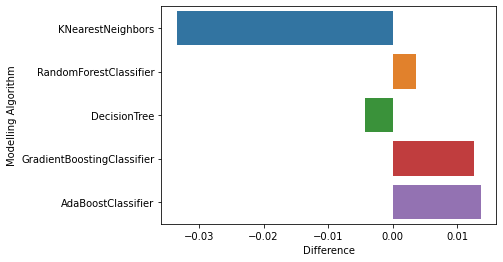

In [142]:
sns.barplot(y='Modelling Algorithm', x='Difference', data=Comparison)

Visual representation of the difference between the accuracy score and the cross validation score.

In [173]:
#HYPERPARAMETER TUNING:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'criterion' : ('gini', 'entropy'),
    'min_samples_split' : range(2,10,2),
    'max_features' : ('auto', 'sqrt', 'log2'),
    'max_depth' : range(1,5)
}

Applied hyperparameter tuning.

In [174]:
grid = GridSearchCV(RandomForestClassifier(), param_grid = grid_param)

Appied grid search cv

In [175]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

Trained the model.

In [176]:
best_parameters = grid.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 4}


Got the best parameters.

In [181]:
#FINAL MODEL
#Substituting the best parameters in the  GradientBoostingClassifier:

rf =  RandomForestClassifier(max_depth = 4, criterion = 'gini', min_samples_split = 4, max_features = 'auto')

rf.fit(X_train, y_train)
pred = rf.predict(X_test)
clf_report = classification_report(y_test,pred)
print(clf_report)


              precision    recall  f1-score   support

           0       0.79      0.94      0.86       137
           1       0.87      0.60      0.71        86

    accuracy                           0.81       223
   macro avg       0.83      0.77      0.79       223
weighted avg       0.82      0.81      0.80       223



The accuracy score of the final model is 81%

In [182]:
#SAVING THE MODEL:

import joblib
joblib.dump(rf, 'TITANIC_final_model.pkl')

['TITANIC_final_model.pkl']

Saved the model.